In [1]:
#Gerekli Kütüphanelerin import edilmesi
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score, roc_auc_score,roc_curve, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn import model_selection
from matplotlib import pyplot as plt
from importlib import reload
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
#Veri yükleme
ogrenme_seti = pd.read_csv('set/ogrenme_seti.csv', sep=',')
corpus = pd.read_csv('set/hepsiburada_corpus.csv', sep=';')
#Veriler arasında farklar olduğu için sep değişkenleri dosyadan dosyaya değişmekte.

In [3]:
#Feature Normalization

#Kelime Sayısı Normalizasiyonu        
kelsay_normal = []
for i in ogrenme_seti['kelsay']:
    normal = (i - ogrenme_seti['kelsay'].min()) / (ogrenme_seti['kelsay'].max() - ogrenme_seti['kelsay'].min())
    kelsay_normal.append(normal)

#Set'e eklenme
ogrenme_seti['kelsay'] = kelsay_normal

In [4]:
#Öğrenme setinde kaç adet 'faydalı' yorum olduğunu bulma. 
ogrenme_seti['fayda'].value_counts()

0    4488
1     267
Name: fayda, dtype: int64

In [5]:
#Model Tanımları
clf = MultinomialNB()
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gradient = GradientBoostingClassifier()
xgb = XGBClassifier()

In [6]:

#Model Eğitimleri.

#MultinomialNB Best random_state=3305
X_train, X_test, y_train, y_test = train_test_split(ogrenme_seti.iloc[:, 0:4], ogrenme_seti.iloc[:,-1:], test_size=0.25,random_state=3305)
clf.fit(X_train,y_train.values.ravel())
y_pred_test = clf.predict(X_test)
print("Naive Bayes::\n", confusion_matrix(y_test,y_pred_test), "\n")
f1_1 = f1_score(y_test,y_pred_test,average='macro')
print(classification_report(y_test,y_pred_test))
print("Accuracy: ",accuracy_score(y_test,y_pred_test))
print("F1 score: ",f1_1)

#Lojistik Regresyon Best random_state=3921
X_train, X_test, y_train, y_test = train_test_split(ogrenme_seti.iloc[:, 0:4], ogrenme_seti.iloc[:,-1:], test_size=0.25,random_state=3921)
lr.fit(X_train,y_train.values.ravel())
y_pred_test = lr.predict(X_test)
print("\nLogisticRegression::\n", confusion_matrix(y_test,y_pred_test), "\n")
f1_2 = f1_score(y_test,y_pred_test,average='macro')
print(classification_report(y_test,y_pred_test))
print("Accuracy: ",accuracy_score(y_test,y_pred_test))
print("F1 score: ",f1_2)

#Karar Ağacı Best random_state=8679
X_train, X_test, y_train, y_test = train_test_split(ogrenme_seti.iloc[:, 0:4], ogrenme_seti.iloc[:,-1:], test_size=0.25,random_state=8679)
dtc.fit(X_train,y_train)
y_pred_test = dtc.predict(X_test)
print("\nDecisionTreeClassifier::\n", confusion_matrix(y_test,y_pred_test), "\n")
f1_3 = f1_score(y_test,y_pred_test,average='macro')
print(classification_report(y_test,y_pred_test))
print("Accuracy: ",accuracy_score(y_test,y_pred_test))
print("F1 score: ",f1_3)

#Rassal Orman Best random_state=6040
X_train, X_test, y_train, y_test = train_test_split(ogrenme_seti.iloc[:, 0:4], ogrenme_seti.iloc[:,-1:], test_size=0.25, random_state=6040)
rfc.fit(X_train,y_train.values.ravel())
y_pred_test = rfc.predict(X_test)
print("\nRandomForestClassifier::\n", confusion_matrix(y_test,y_pred_test), "\n")
f1_4 = f1_score(y_test,y_pred_test,average='macro')
print(classification_report(y_test,y_pred_test))
print("Accuracy: ",accuracy_score(y_test,y_pred_test))
print("F1 score: ",f1_4)

#Gradyan Arttırma Best random_state=5211
X_train, X_test, y_train, y_test = train_test_split(ogrenme_seti.iloc[:, 0:4], ogrenme_seti.iloc[:,-1:], test_size=0.25, random_state=5211)
gradient.fit(X_train,y_train.values.ravel())
y_pred_test = gradient.predict(X_test)
print("\nGradientBoostingClassifier::\n", confusion_matrix(y_test,y_pred_test), "\n")
f1_5 = f1_score(y_test,y_pred_test,average='macro')
print(classification_report(y_test,y_pred_test))
print("Accuracy: ",accuracy_score(y_test,y_pred_test))
print("F1 score: ",f1_5)

#XGB Best random_state=6366
X_train, X_test, y_train, y_test = train_test_split(ogrenme_seti.iloc[:, 0:4], ogrenme_seti.iloc[:,-1:], test_size=0.25, random_state=6366)
xgb.fit(X_train,y_train.values.ravel())
y_pred_test = xgb.predict(X_test)
print("\nXGBClassifier::\n", confusion_matrix(y_test,y_pred_test), "\n")
f1_6 = f1_score(y_test,y_pred_test,average='macro')
print(classification_report(y_test,y_pred_test))
print("Accuracy: ",accuracy_score(y_test,y_pred_test))
print("F1 score: ",f1_6)

Naive Bayes::
 [[1134    0]
 [  44   11]] 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1134
           1       1.00      0.20      0.33        55

    accuracy                           0.96      1189
   macro avg       0.98      0.60      0.66      1189
weighted avg       0.96      0.96      0.95      1189

Accuracy:  0.9629941126997477
F1 score:  0.6571510957324107

LogisticRegression::
 [[1124    3]
 [  45   17]] 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1127
           1       0.85      0.27      0.41        62

    accuracy                           0.96      1189
   macro avg       0.91      0.64      0.70      1189
weighted avg       0.96      0.96      0.95      1189

Accuracy:  0.9596299411269975
F1 score:  0.6968641114982578

DecisionTreeClassifier::
 [[1129    7]
 [  36   17]] 

              precision    recall  f1-score   support

           0       

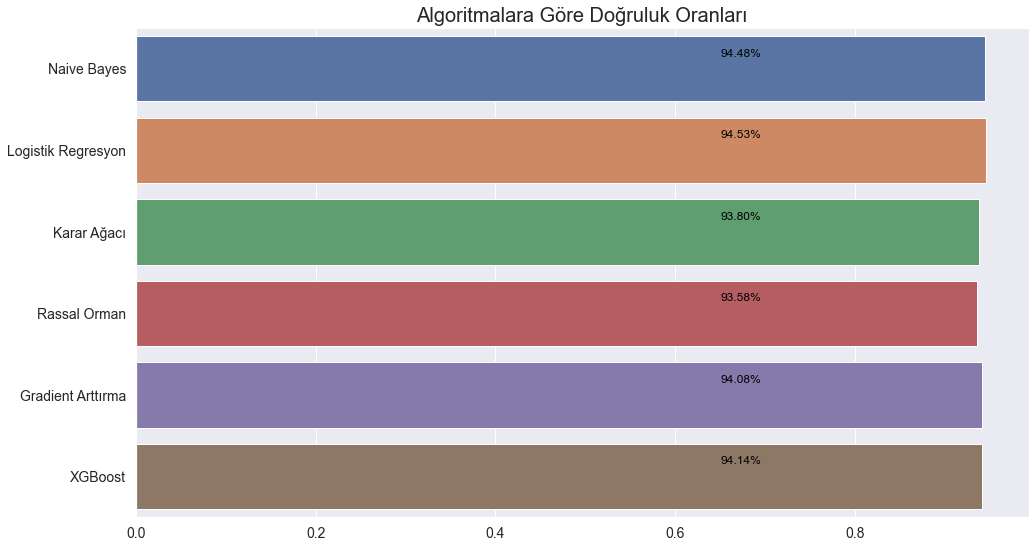

In [7]:
#Algoritma Bazlı Cross Validation ile Accuracy Skoru Hesaplama.
score= cross_val_score(clf, X_train, y_train.values.ravel(), cv=5)
score2= cross_val_score(lr, X_train, y_train.values.ravel(), cv=5)
score3= cross_val_score(dtc, X_train, y_train.values.ravel(), cv=5)
score4= cross_val_score(rfc, X_train, y_train.values.ravel(), cv=5)
score5= cross_val_score(gradient, X_train, y_train.values.ravel(), cv=5)
score6= cross_val_score(xgb, X_train, y_train.values.ravel(), cv=5)


#Görselleştirme
methods= ["Naive Bayes","Logistik Regresyon", "Karar Ağacı","Rassal Orman", "Gradient Arttırma","XGBoost"]
accuracy = [score.mean(),score2.mean(),score3.mean(),score4.mean(),score5.mean(),score6.mean()]
sns.set()
from matplotlib import pyplot as plt
plt.figure(figsize = (16,9))
plt.title('Algoritmalara Göre Doğruluk Oranları', fontsize=20)
plt.ylabel="Uygulanan Algoritmalar"
plt.xlabel="Başarı Oranı"
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.barplot(x=accuracy, y=methods)
for line in range(len(methods)):
  plt.text(0.65,line-0.15,"{:.2f}%".format(accuracy[line]*100),horizontalalignment ='left', color='black', size='large')
plt.savefig('fig/Accuracy', dpi=600) #Yüksek kalitede olması amacıyla dpi=600 yaptık.

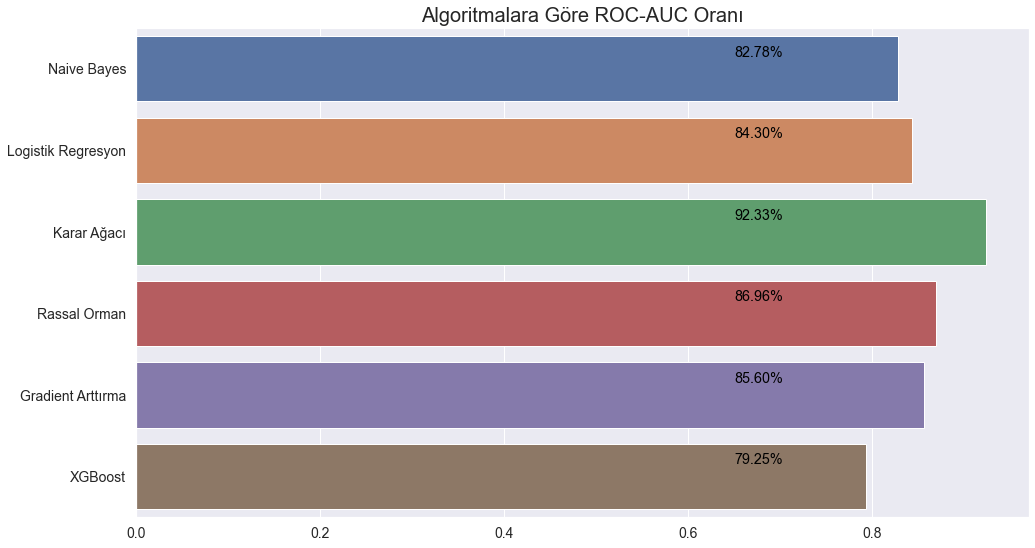

In [8]:
#Algoritma Bazlı ROC-AUC Skoru Hesaplama.
rf_predictions = clf.predict(X_test)
rf_probs = clf.predict_proba(X_test)[:, 1]
score= roc_auc_score(y_test, rf_probs)

rf_predictions = lr.predict(X_test)
rf_probs = lr.predict_proba(X_test)[:, 1]
score2= roc_auc_score(y_test, rf_probs)

rf_predictions = dtc.predict(X_test)
rf_probs = dtc.predict_proba(X_test)[:, 1]
score3= roc_auc_score(y_test, rf_probs)

rf_predictions = rfc.predict(X_test)
rf_probs = rfc.predict_proba(X_test)[:, 1]
score4= roc_auc_score(y_test, rf_probs)

rf_predictions = gradient.predict(X_test)
rf_probs = gradient.predict_proba(X_test)[:, 1]
score5= roc_auc_score(y_test, rf_probs)

rf_predictions = xgb.predict(X_test)
rf_probs = xgb.predict_proba(X_test)[:, 1]
score6= roc_auc_score(y_test, rf_probs)

methods= ["Naive Bayes","Logistik Regresyon", "Karar Ağacı","Rassal Orman", "Gradient Arttırma","XGBoost"]
roc_auc = [score.mean(),score2.mean(),score3.mean(),score4.mean(),score5.mean(),score6.mean()]
sns.set()
plt=reload(plt)
plt.figure(figsize = (16,9))
plt.title('Algoritmalara Göre ROC-AUC Oranı', fontsize = 20)
plt.ylabel="Uygulanan Algoritmalar"
plt.xlabel="Başarı Oranı"
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.barplot(x=roc_auc, y= methods)
for line in range(len(methods)):
  plt.text(0.65,line-0.15,"{:.2f}%".format(roc_auc[line]*100),horizontalalignment ='left',size ='large', color='black')
plt.savefig('fig/ROC-AUC',dpi=600)
plt.show()

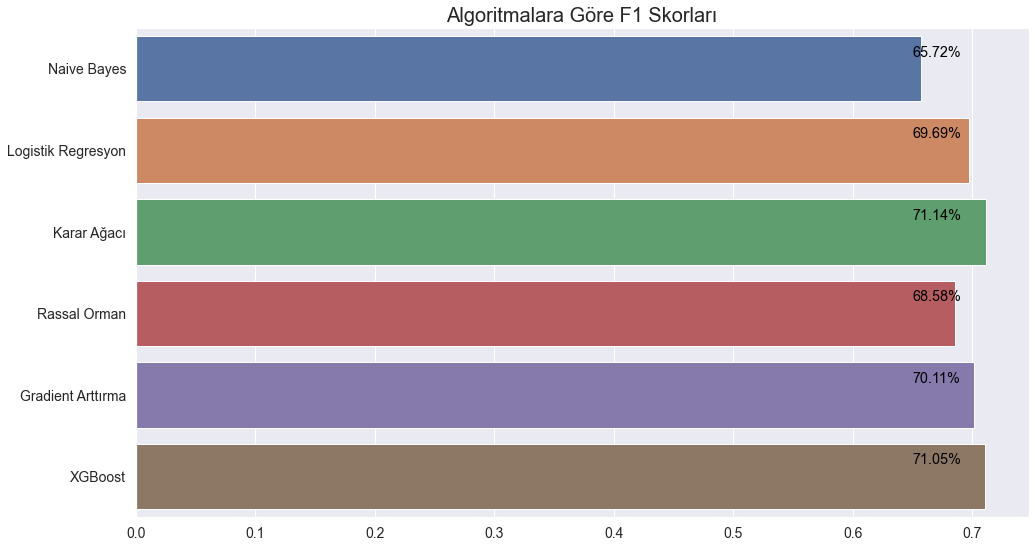

In [10]:
#Algoritma Bazlı F1 Skoru Hesaplama.
methods= ["Naive Bayes","Logistik Regresyon", "Karar Ağacı","Rassal Orman", "Gradient Arttırma","XGBoost"]

#Burada diğer görseller gibi sıfırdan değer hesaplamamız gerekmedi çünkü f1 değerlerini algoritmaları eğitirken oluşturmuştur.
f1_score_listesi = [f1_1.mean(),f1_2.mean(),f1_3.mean(),f1_4.mean(),f1_5.mean(),f1_6.mean()]
sns.set()
plt=reload(plt)
plt.figure(figsize = (16,9))
plt.title('Algoritmalara Göre F1 Skorları', fontsize=20)
plt.ylabel="Uygulanan Algoritmalar"
plt.xlabel="Başarı Oranı"
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.barplot(x=f1_score_listesi, y= methods)
for line in range(len(methods)):
  plt.text(0.65,line-0.15,"{:.2f}%".format(f1_score_listesi[line]*100),horizontalalignment ='left',size ='large', color='black')
plt.savefig('fig/F1_Skorları',dpi=600)

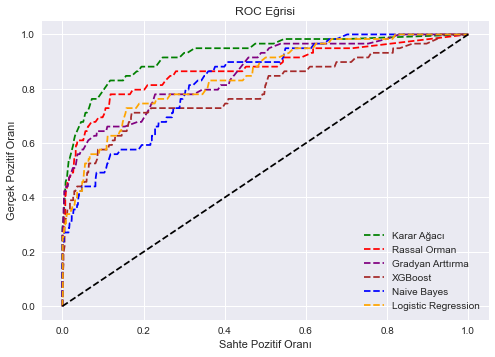

In [11]:
#Daha önce hazırlamış olduğumuz ROC-AUC oranlarını bir de ROC-AUC grafiği olarak gösteriyoruz.
plt=reload(plt)
plt.style.use('seaborn')


#dtc   rfc   gradient   xgb   clf   lr  <-- algoritmalarının isimleri
pred_prob_dtc = dtc.predict_proba(X_test)
pred_prob_rfc = rfc.predict_proba(X_test)
pred_prob_gradient = gradient.predict_proba(X_test)
pred_prob_xgb = xgb.predict_proba(X_test)
pred_prob_clf = clf.predict_proba(X_test)
pred_prob_lr = lr.predict_proba(X_test)

#fpr, tpr <-- false-positive-rate true-positive-rate
fpr_dtc, tpr_dtc, thresh_dtc = roc_curve(y_test, pred_prob_dtc[:,1], pos_label=1)
fpr_rfc, tpr_rfc, thresh_rfc = roc_curve(y_test, pred_prob_rfc[:,1], pos_label=1)
fpr_gradient, tpr_gradient, thresh_gradient = roc_curve(y_test, pred_prob_gradient[:,1], pos_label=1)
fpr_xgb, tpr_xgb, thresh_xgb = roc_curve(y_test, pred_prob_xgb[:,1], pos_label=1)
fpr_clf, tpr_clf, thresh_clf = roc_curve(y_test, pred_prob_clf[:,1], pos_label=1)
fpr_lr, tpr_lr, thresh_lr = roc_curve(y_test, pred_prob_lr[:,1], pos_label=1)

#random probs <-- rastgele ihtimaller. Bu ihtimallerin ROC-AUC oranlarının ortalamasını bulmak için kullanılır. 
#Figürdeki 45 Derecelik açıyla olan yatay çizgi, bu oranı gösterir. 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

#plot roc curves <-- Değerleri ROC-AUC grafiğine ekler.
plt.plot(fpr_dtc, tpr_dtc, linestyle='--',color='green', label='Karar Ağacı')
plt.plot(fpr_rfc, tpr_rfc, linestyle='--',color='red', label='Rassal Orman')
plt.plot(fpr_gradient, tpr_gradient, linestyle='--',color='purple', label='Gradyan Arttırma')
plt.plot(fpr_xgb, tpr_xgb, linestyle='--',color='brown', label='XGBoost')
plt.plot(fpr_clf, tpr_clf, linestyle='--',color='blue', label='Naive Bayes')
plt.plot(fpr_lr, tpr_lr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')

plt.title('ROC Eğrisi')
# x label
plt.xlabel('Sahte Pozitif Oranı')
# y label
plt.ylabel('Gerçek Pozitif Oranı')
plt.legend(loc='best')
plt.savefig('fig/ROC',dpi=600)
plt.show()

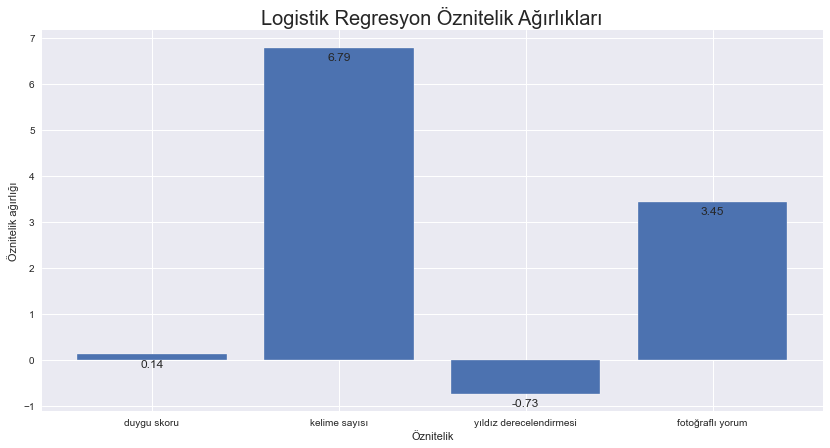

In [13]:
#Algoritma Bazlı Öznitelik Ağırlıkları
#Sadece bir algoritma için hesaplayacağım ancak diğer algoritmalar için görselleştirme adına nasıl yapmanız gerektiğini de göstereceğim.


plt=reload(plt)
agirliklar = lr.coef_[0].tolist()   # <-- Burası, Linear Algoritmalar için farklı, non-Linear algoritmalar için farklı. Aşağıdaki yorum satırını referans alabilirsiniz. 
#predict = rfc.predict(X_test)
x_label = [x for x in range(len(agirliklar))]
#                clf  lr  ---> .coef_[0].tolist()  
#dtc   rfc  gradient  xgb ---> feature_importances_.tolist()

#dtc = Karar Ağacı  --> Karar
#rfc = Rassal Orman  --> Rassal
#gradient = Gradyan Arttırma --> Gradyan   
#xgb = XGBoost   --> XGBoost
#clf = Naive Bayes  --> Naive
#lr = Logistik Regresyon --> Logistic

plt.figure(figsize = (14,7))
plt.bar(x_label,agirliklar)
x_egrisi = ['duygu skoru', 'kelime sayısı', 'yıldız derecelendirmesi', 'fotoğraflı yorum']
plt.xticks(x_label, x_egrisi)
plt.title('Logistik Regresyon Öznitelik Ağırlıkları', fontsize = 20)  # <-- Farklı bir algoritmanın özniteliklerini alırken burayı değiştirmeyi unutmayın. 
plt.xlabel('Öznitelik')
plt.ylabel('Öznitelik ağırlığı')
plt.xticks
for x,y in zip([x for x in range(len(agirliklar))],agirliklar): #Görselin üstündeki metinleri düzeltme çabaları. 

    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-13), # distance from text to points (x,y)
                 ha='center')

plt.savefig('fig/Logistik Regresyon Ağırlık',dpi=600)  # <-- Farklı bir algoritmanın özniteliklerini alırken burayı değiştirmeyi unutmayın. 


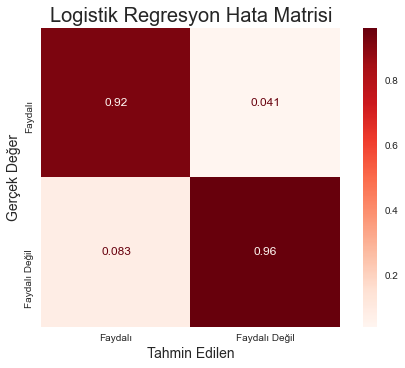

In [14]:
#Tahmin Hata Matrisi
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
plt=reload(plt)
predict = lr.predict(X_test)
#dtc = Karar Ağacı  --> Karar
#rfc = Rassal Orman  --> Rassal
#gradient = Gradyan Arttırma --> Gradyan   
#xgb = XGBoost   --> XGBoost
#clf = Naive Bayes  --> Naive
#lr = Logistik Regresyon --> Logistic
plt.rcParams["axes.grid"] = False
ConfusionMatrixDisplay.from_predictions(y_test, predict,labels=[1,0],normalize='pred',cmap='Reds',display_labels=['Faydalı','Faydalı Değil'])
#Normalize hakkındaki açıklamalar için medium yazısına bakın.
#plot_confusion_matrix(clf, X_test, y_test)
plt.yticks(rotation=90)
plt.title('Logistik Regresyon Hata Matrisi',fontsize= 20) # <-- Farklı bir algoritmanın özniteliklerini alırken burayı değiştirmeyi unutmayın. 
plt.xlabel('Tahmin Edilen',fontsize= 14)
plt.ylabel('Gerçek Değer',fontsize= 14)
plt.savefig('fig/Logistik Regresyon Hata Matrisi',dpi=600)  # <-- Farklı bir algoritmanın özniteliklerini alırken burayı değiştirmeyi unutmayın. 
